In [97]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split  
from sklearn.metrics import confusion_matrix,accuracy_score

import numpy as np

In [98]:
iris=load_iris()
# x = iris.data #accuracy become 1 when all data get fid to model
x=iris.data[:,:2] #accuracy reduce due to lack of feeded data
y=iris.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [99]:
# print(x_train,y_train)
# print(y_train)
# print(x)
# print(y)

In [100]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
# print(x_test)

In [101]:
knn=KNeighborsClassifier(n_neighbors=3)
model=knn.fit(x_train,y_train)

In [102]:
y_pred=model.predict(x_test)
print(f"\n",y_pred,"\n",y_test)


 [1 0 2 1 1 0 1 2 1 2 2 0 0 0 0 2 2 1 2 2 0 1 0 2 2 1 2 2 0 0 0 0 1 0 0 2 2
 0 0 0 2 2 1 0 0] 
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


In [103]:
matrix_result=confusion_matrix(y_test,y_pred)
print(matrix_result)
accuracy=accuracy_score(y_test,y_pred)
print("accuracy:- ",accuracy)

[[19  0  0]
 [ 0  8  5]
 [ 0  2 11]]
accuracy:-  0.8444444444444444


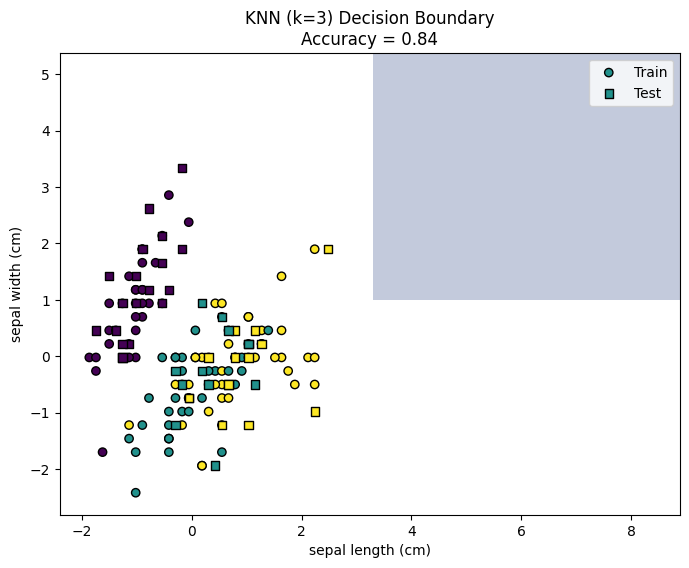

In [105]:
h = 0.02  # mesh step size
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolor='k', marker='o', label="Train")
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, edgecolor='k', marker='s', label="Test")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title(f"KNN (k=3) Decision Boundary\nAccuracy = {accuracy:.2f}")
plt.legend()
plt.show()
